In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-10 16:09:07,452 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-10 16:09:07,454 -INFO - common:common.py:618 - Module utils.common is loaded...
2021-06-10 16:09:07,455 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-10 16:09:07,457 -INFO - dataset_builder:dataset_builder.py:207 - dataset package is loaded...
2021-06-10 16:09:08,055 -INFO - dataset:dataset.py:653 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = 'https://getbootstrap.com/docs/5.0/components/card/'
WAIT_TIME_SECONDS = 7
# LOGIN = 'Roman'
# PASSWORD = 'Jdi1234'
# SAVE_SCREEN = True
# WAIT_TIME_SECONDS = 7
# HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
decoder_dict

{0: 'button',
 1: 'link',
 2: 'textfield',
 3: 'dropdown',
 4: 'checkbox',
 5: 'radiobutton',
 6: 'textarea',
 7: 'fileinput',
 8: 'iframe',
 9: 'range',
 10: 'progressbar',
 11: 'datetimeselector',
 12: 'colorpicker',
 13: 'numberselector',
 14: 'selector',
 15: 'table',
 16: 'slider-toggle',
 17: 'slider',
 18: 'tree-node',
 19: 'steper',
 20: 'tab',
 21: 'n/a'}

# Generate dataset

In [6]:
DATASET_NAME = 'bootstrap-1'

In [7]:
# class JDIDatasetBuilder(DatasetBuilder):

#     def setUp(self, driver):
#         self.logger.info(f'getting page')
#         driver.set_window_size(width=1920, height=1090)
#         driver.get(SITE_URL)
        
# #         driver.find_element_by_id("user-icon").click()
# #         driver.find_element_by_id("name").send_keys(LOGIN)
# #         driver.find_element_by_id("password").send_keys(PASSWORD)
# #         driver.find_element_by_id("login-button").click()
#         sleep(WAIT_TIME_SECONDS)
        
# #         driver.find_element_by_link_text("Service").click()
# #         driver.find_element_by_link_text("Complex Table").click()
#         maximize_window(driver=driver)
        

# with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True) as builder:
#     elements_df = builder.dataset
#     plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))

In [8]:
df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')

In [9]:
df = build_features(df)

2021-06-10 16:09:09,381 -INFO - hidden:hidden.py:107 - build field "is_hidden"


In [10]:
elements_dict = build_elements_dict(df)

In [11]:
df[['tag_name', 'element_id', 'parent_id', 'upper_sibling', 'lower_sibling', 'displayed', 'is_hidden', 'x', 'y', 'width', 'height']]

,tag_name,element_id,parent_id,upper_sibling,lower_sibling,displayed,is_hidden,x,y,width,height
0,HTML,6023281756286317041115139043,None,None,None,True,0,0.00000,0.0,1886.00,33972.0
1,HEAD,0228794232286317046160760544,6023281756286317041115139043,None,3446720840286317046284519030,False,0,0.00000,0.0,0.00,0.0
2,META,2584363046286317048689488181,0228794232286317046160760544,None,4176049189286317047186826483,False,0,0.00000,0.0,0.00,0.0
3,META,4176049189286317047186826483,0228794232286317046160760544,2584363046286317048689488181,0775011548286317042092952214,False,0,0.00000,0.0,0.00,0.0
4,META,0775011548286317042092952214,0228794232286317046160760544,4176049189286317047186826483,4044720240286317046733076564,False,0,0.00000,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5224,A,5210061610286317112415236645,0885055580286317118772064243,None,8877600859286317116655271597,True,0,528.28125,33904.0,24.75,19.0
5225,A,8877600859286317116655271597,0885055580286317118772064243,5210061610286317112415236645,None,True,0,592.59375,33904.0,59.75,19.0
5226,SCRIPT,3014221210286317119771485465,3446720840286317046284519030,9248715296286317119087792596,4797419076286317115962642544,False,1,0.00000,0.0,0.00,0.0
5227,SCRIPT,4797419076286317115962642544,3446720840286317046284519030,3014221210286317119771485465,7501260202286317117164001389,False,1,0.00000,0.0,0.00,0.0


In [12]:
# img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 100))
# plt.imshow(img, cmap='gray')

In [13]:
predictions_df = rule_base_predict(df)
print(predictions_df.shape)
# predictions_df

2021-06-10 16:09:11,538 -INFO - common:common.py:491 - Num radio buttons found: 0
2021-06-10 16:09:11,543 -INFO - common:common.py:495 - Num radio2 buttons found: 0
2021-06-10 16:09:11,547 -INFO - common:common.py:502 - Num checkboxes found: 0
2021-06-10 16:09:11,553 -INFO - common:common.py:509 - Num comboboxes/dropdowns found: 0
2021-06-10 16:09:11,558 -INFO - common:common.py:520 - Num textfields found: 0
2021-06-10 16:09:11,563 -INFO - common:common.py:525 - Num texfields for numbers found: 0
2021-06-10 16:09:11,568 -INFO - common:common.py:530 - Num ranges found: 0
2021-06-10 16:09:11,573 -INFO - common:common.py:535 - Num ordinary text inputs found: 0
2021-06-10 16:09:11,575 -INFO - common:common.py:538 - Num buttons found: 44
2021-06-10 16:09:11,580 -INFO - common:common.py:543 - Num buttons1 found: 0
2021-06-10 16:09:11,584 -INFO - common:common.py:548 - Num buttons2 (Material-UI) found: 0
2021-06-10 16:09:11,587 -INFO - common:common.py:553 - Num links found: 218
(185, 8)


1903 33671


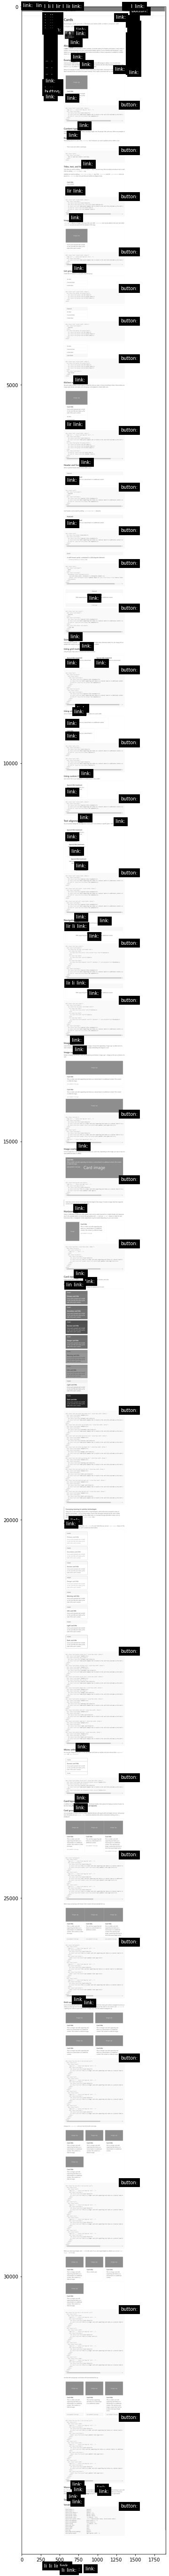

In [14]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in predictions_df.iterrows():
    
    patch = patches.Rectangle((r.x, r.y), r.width, r.height, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(r.x, r.y, 
             decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

# Generate and Save Labels

In [15]:
# labels = build_to_yolo(df = predictions_df, img_width=img_width, img_heght=img_height)
# labels

In [16]:
# labeled_df = pd.DataFrame(labels, columns=['label', 'x', 'y', 'width', 'height'])
# labeled_df.label = labeled_df.label.astype(int)
# display(labeled_df)
# labeled_df.to_csv(f'dataset/annotations/{DATASET_NAME}.txt', header=False, sep=' ', index=False)

# Preview Labels

In [17]:
boxes_df = pd.read_csv(f'dataset/annotations/{DATASET_NAME}.txt', sep=' ', names = ['label', 'x', 'y', 'width', 'height'])
boxes_df
boxes_df['box'] = boxes_df.apply(lambda r: from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height), axis=1)
boxes_df.head()

,label,x,y,width,height,box
0,1,0.167630,0.000936,0.029427,0.001515,"(291, 6, 55, 51)"
1,1,0.197846,0.001025,0.024698,0.000980,"(353, 18, 47, 32)"
2,1,0.224908,0.000980,0.026274,0.001188,"(403, 12, 49, 40)"
3,1,0.260116,0.000980,0.040988,0.001010,"(456, 15, 78, 34)"
4,1,0.295586,0.000980,0.022596,0.001069,"(541, 15, 43, 35)"


1903 33671


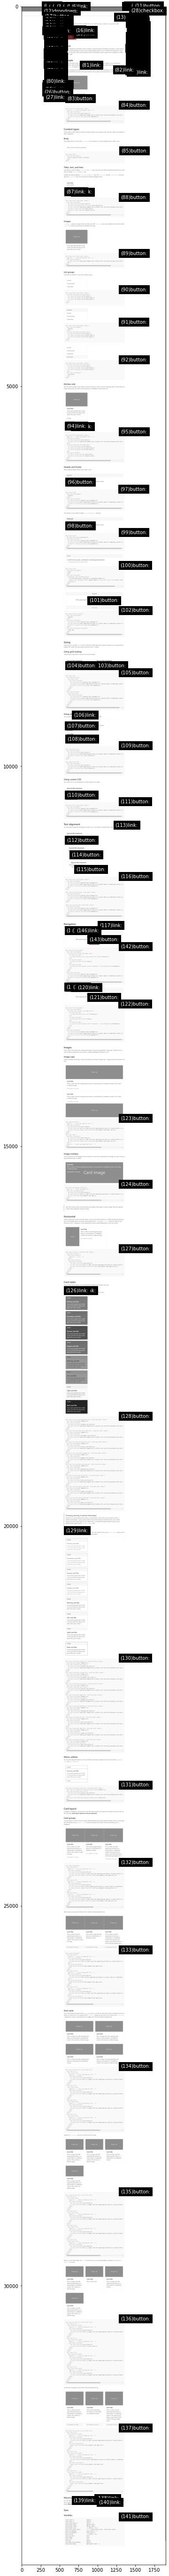

In [18]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for i, r in boxes_df.iterrows():
    x, y, w, h = from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height)    
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(x, y, 
             f'({i})' + decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

In [19]:
# df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings'],
      dtype='object')

In [20]:
df = assign_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=img_width, img_height=img_height)

2021-06-10 16:09:21,567 -INFO - labels:labels.py:41 - Assign labels from annotation file: dataset/annotations/bootstrap-1.txt
2021-06-10 16:09:21,569 -INFO - labels:labels.py:43 - Getting image size
2021-06-10 16:09:21,569 -INFO - labels:labels.py:45 - Image size (w,h): (1903, 33671)
2021-06-10 16:09:21,570 -INFO - labels:labels.py:50 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-10 16:09:21,571 -INFO - labels:labels.py:58 - getting "n/a" class code
2021-06-10 16:09:21,571 -INFO - labels:labels.py:65 - "n/a" class code: 21
2021-06-10 16:09:21,574 -INFO - labels:labels.py:75 - 147 annotation has been read


Assign labels:   0%|          | 0/147 [00:00<?, ?it/s]

2021-06-10 16:10:31,126 -INFO - labels:labels.py:124 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-10 16:10:31,127 -INFO - labels:labels.py:127 - 147 labels have been assigned


In [21]:
# df = build_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=0, img_height=0)

In [22]:
df.label.value_counts()

21    5082
1       88
0       57
4        1
3        1
Name: label, dtype: int64

1903 33671


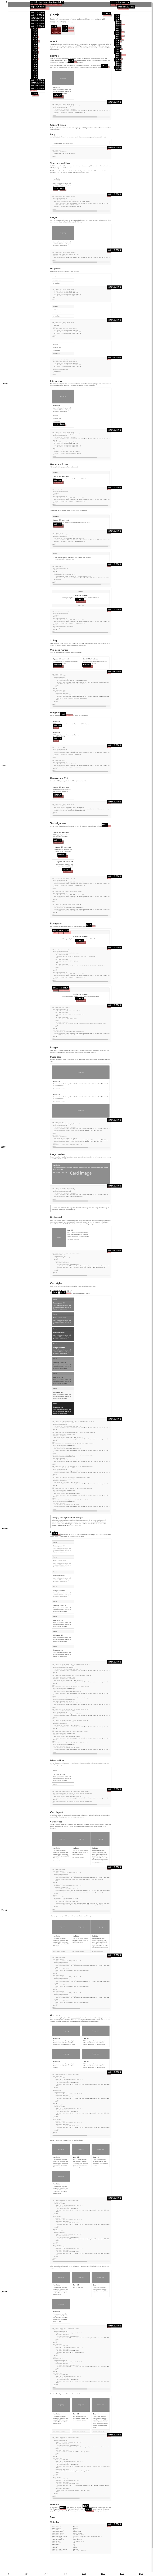

In [23]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 300))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in df[df.label_text != 'n/a'].iterrows():
    x, y, w, h = r.x, r.y, r.width, r.height  
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    
    # print(r.tag_name, r.label_text, (x,y,w,h), r.element_id)
    
    axes.add_patch(patch)
    plt.text(x, y, 
             decoder_dict[r.label] + ':' + r.tag_name, # + ':' + str((x, y, w, h)),  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
